## Projeto Modulo 3 & 4

### Relação nota Vs Investimento

Eu, como Gestor de Conteúdo, gostaria de visualizar a relação Investimento Vs Nota, para avaliar o retorno real dos filmes.

**REGRA DE NEGÓCIO**
- A partir do investimento, ranquear:
- - Sucesso: menores investimentos e maiores notas &#x2705;
- - Fracasso: maiores investimentos e menores notas &#x2705;

**CRITÉRIOS DE ACEITE**
- Exibir de forma gráfica &#x2705;
- Ser possível alternar entre sucesso e fracasso &#x2705;
- Apresentar o Top 15 &#x2705;



#### Bibliotecas

In [2]:
from tqdm import tqdm, tqdm_notebook
from IPython.display import clear_output
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import seaborn as sns




#### Importando Base de Dados

In [3]:
# Importando todos os arquivos de uma pasta.

## Windows x Linux
#path = '/home/csvaz/dev/projeto/data'
path = 'C:\DataScience\projeto\data'

for _, _, arquivo in os.walk(path):
    print('Arquivos Disponiveis:')
    print(arquivo)

    
for arq in tqdm_notebook(arquivo, desc= 'Carregando...'):
    name = arq
    name = name.replace('IMDb ', '')
    name = name.replace('.csv', '')
    arq = '{}/{}'.format(path,arq)
       
    globals()['df_' + name] = pd.read_csv(arq)
    print('df_{}'.format(name))
    

    


Arquivos Disponiveis:
['IMDb movies.csv', 'IMDb names.csv', 'IMDb ratings.csv']


df_movies
df_names
df_ratings



#### ETL Movies

###### Budget

In [5]:
df_movies.head()
df_movies = df_movies[['imdb_title_id','title', 'year','avg_vote', 'budget', 'worlwide_gross_income']]

,imdb_title_id,title,year,avg_vote,budget,worlwide_gross_income
0,tt0000574,The Story of the Kelly Gang,1906,6.1,$ 2250,NaN
1,tt0001892,Den sorte drøm,1911,5.9,NaN,NaN


In [6]:
df_movies_budget = df_movies.budget.str.split(expand=True, pat=' ')

In [7]:
df_movies_budget.columns = ['Currency', 'Budget-Value']

In [8]:
df_movies_etl = pd.concat([df_movies, df_movies_budget],axis = 1)

In [9]:
df_movies_etl.head(2)

,imdb_title_id,title,year,avg_vote,budget,worlwide_gross_income,Currency,Budget-Value
0,tt0000574,The Story of the Kelly Gang,1906,6.1,$ 2250,NaN,$,2250
1,tt0001892,Den sorte drøm,1911,5.9,NaN,NaN,NaN,NaN


###### Income

In [10]:
df_movies.worlwide_gross_income.unique()

array([nan, '$ 8811', '$ 4272', ..., '$ 420126', '$ 4791', '$ 2833'],
      dtype=object)

In [11]:
df_movies_income = df_movies.worlwide_gross_income.str.split(expand=True, pat=' ')

In [12]:
df_movies_income.columns = ['Income-Currency', 'Income-Value']

In [13]:
df_movies_etl = pd.concat([df_movies_etl, df_movies_income],axis = 1)

In [15]:
df_movies_etl=df_movies_etl[(df_movies_etl.Currency == "$")]

In [16]:
df_movies_etl = df_movies_etl[['imdb_title_id','title','avg_vote','Budget-Value','Income-Value']]

In [17]:
df_movies_etl.head(2)

,imdb_title_id,title,avg_vote,Budget-Value,Income-Value
0,tt0000574,The Story of the Kelly Gang,6.1,2250,NaN
2,tt0002101,Cleopatra,5.2,45000,NaN
8,tt0002461,Richard III,5.5,30000,NaN
17,tt0003471,Traffic in Souls,6.1,5700,NaN
22,tt0003740,Cabiria,7.1,210000,NaN


#### Income - Budget

In [18]:
df_movies_etl['income-budget'] = round(df_movies_etl['Income-Value'].astype(float) / df_movies_etl['Budget-Value'].astype(float),2)

In [19]:
df_movies_etl[['Budget-Value','Income-Value','income-budget']] = df_movies_etl[['Budget-Value','Income-Value','income-budget']].astype(float)

In [20]:
df_movies_etl[['Budget-Value','Income-Value']] = round(df_movies_etl[['Budget-Value','Income-Value']] / 10,2)

In [21]:
df_movies_etl.head(2)

,imdb_title_id,title,avg_vote,Budget-Value,Income-Value,income-budget
0,tt0000574,The Story of the Kelly Gang,6.1,225.0,NaN,NaN
2,tt0002101,Cleopatra,5.2,4500.0,NaN,NaN


In [22]:
df_movies_etl = df_movies_etl[(df_movies_etl['income-budget'].notnull())]
df_movies_etl = df_movies_etl.sort_values(by=['avg_vote','Budget-Value'], ascending = [False,True]  )

### Resultado 

##### Visão Geral

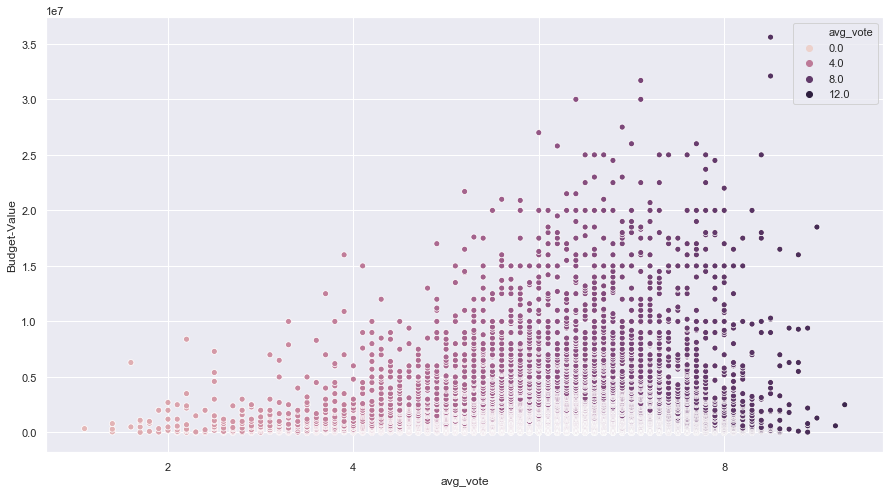

In [23]:
sns.set(style="darkgrid")

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="avg_vote", y='Budget-Value', ax = ax, data=df_movies_etl, 
                     hue="avg_vote", hue_norm=(0, 10))

plt.show()

##### Top 3 Melhores (Outliers)



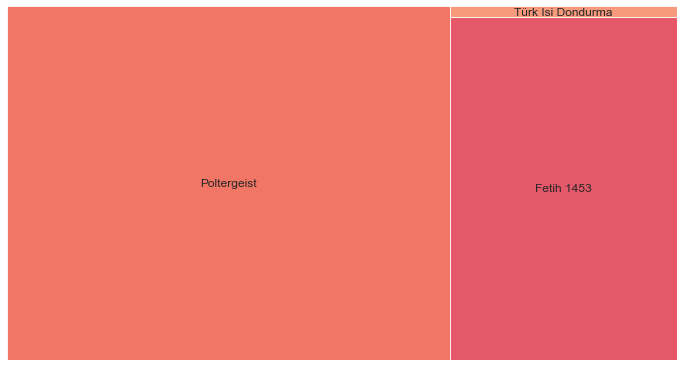

In [24]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6.5)


df_top3  = df_movies_etl.sort_values(by=['income-budget'], ascending = [False]).head(3)
squarify.plot(sizes=df_top3 ['income-budget'], label=df_top3 ['title'], alpha=.8,  )
plt.axis('off')
plt.show()


#### TOP 15 SEM OULTLIERS (+)

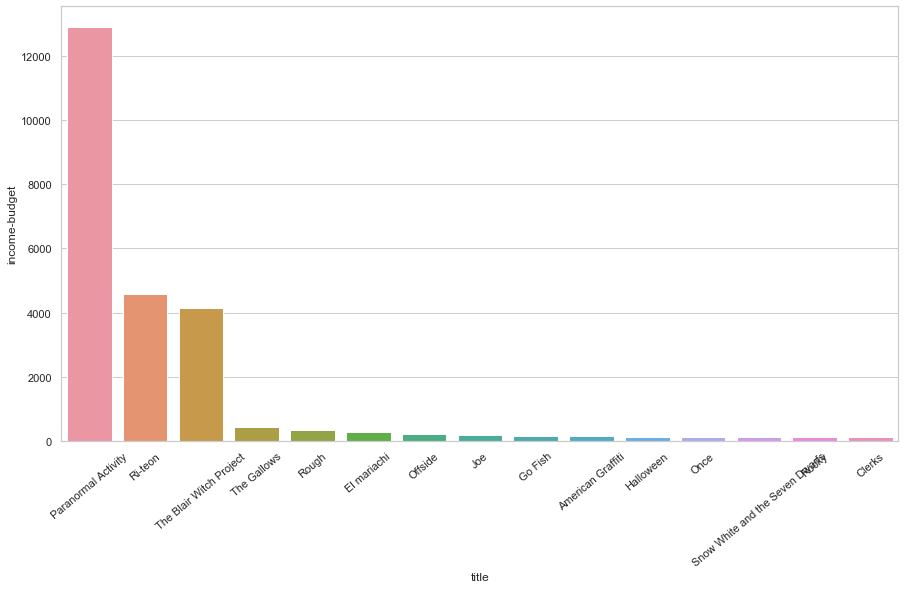

In [25]:
df_top15_soutliers  = df_movies_etl.sort_values(by=['income-budget'], ascending = [False]).head(20)
df_top15_soutliers = df_top15_soutliers.iloc[3:18,:]

sns.set(style="whitegrid")

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax = sns.barplot(x="title", y='income-budget', data=df_top15_soutliers)





#### TOP 15 - Prejuizo


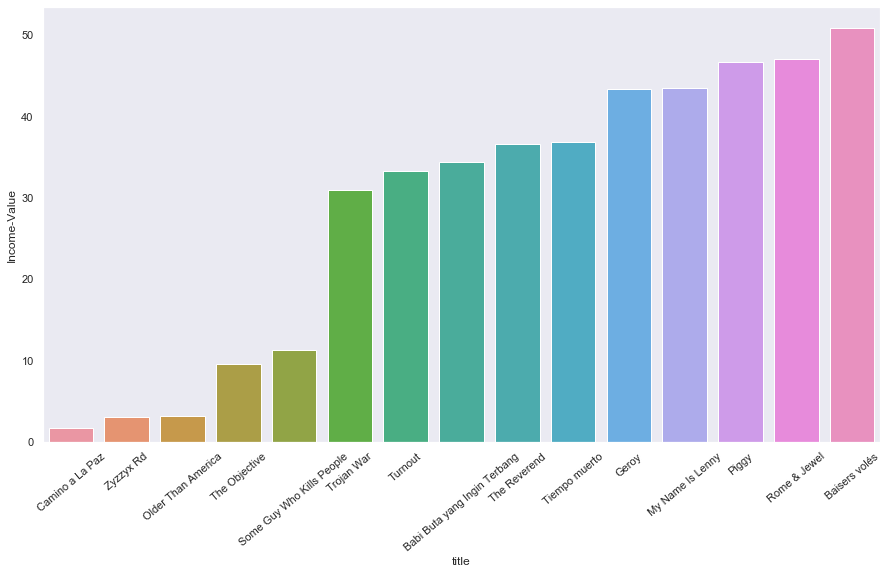

In [45]:
df_top15_nsoutliers  = df_movies_etl[(df_movies_etl['income-budget'].notnull())].sort_values(by=['income-budget',
  
                                                                                                 
                                                                                                 'Income-Value'], ascending = [True,True]).head(15)
sns.set(style="dark")

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax = sns.barplot(x="title", y='Income-Value', data=df_top15_nsoutliers)
